<a href="https://colab.research.google.com/github/Twisterrr/Time-Series-Analysis-Project/blob/main/Nonseasonal_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Time Series Analysis Project**


## Nonseasonal Time Series Analysis

---



> D22125067 Clement BERARD

> D22125152 Sephora Panchbaya


---






### **Summary**
*   Dataset name : **Global Annual Population Growth (1951 - 2020)**
*   Dataset source : https://www.kaggle.com/datasets/mattop/global-annual-population-growth-1951-2020
*   1- Goal of the project 
*   2- Background of the data
*   3- Data preprocessing
*   4- Plotting the time series
*   5- Checking stationnarity
*   6- Plotting ACF and PACF
*   7- Defining the model
*   8- Residuals Analysis
*   9- Testing
*   10- Forecasting


-------------------------------------------------------------------------

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import ceil
from itertools import product
from tqdm import tqdm_notebook
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')

## **Part 1 : Nonseasonal Time Series Analysis**

### 1- Goal
The goal of this part of the project is to try to make a prediction on the total number of people in the world in the coming years. We want to make predictions for year 2021 to 2025.

### 2- Background of the data : 

The dataset contains the total population and urban population for each year (1951 - 2020) as well as the population growth rate as a percentage.

For this project, we will look at the total population recorded every year since 1951.

### 3- Data Preprocessing
In order to do this we have made some changes to the dataset. First, we removed the columns that will not be used and that correspond to yearly growth, density and urban population.

In [ ]:
#creating a df with the 2 columns we will use
pop = pd.read_csv('https://raw.githubusercontent.com/Shifuumi/Time-Series-analysis/main/world-population.csv', usecols = ['year','population'], header=0) #usecols let us choose the colomns we want to keep in the dataframe

pop.head()

,year,population
0,1951,2584034261
1,1952,2630861562
2,1953,2677608960
3,1954,2724846741
4,1955,2773019936


### 4- Plotting the time series

Text(0, 0.5, 'Population (x1B)')

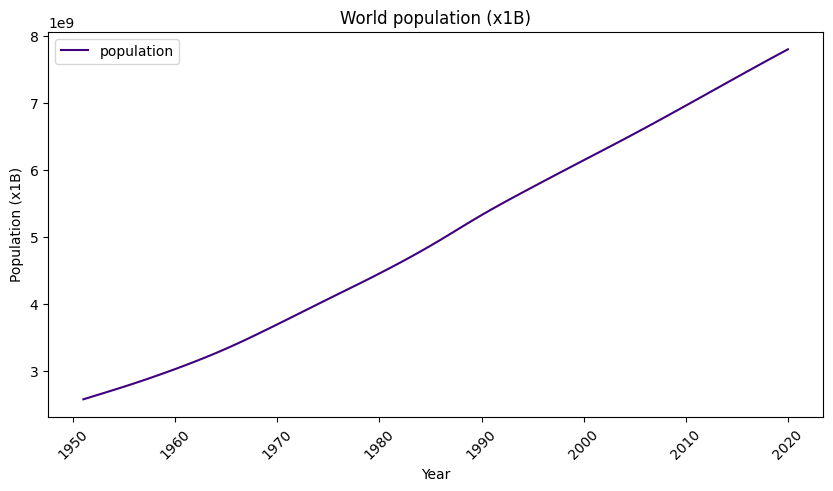

In [ ]:
ax = pop.plot(x= 'year', y = 'population', colormap='Purples_r', title='World population (x1B)', rot=45, figsize=(10,5))
ax.set_xlabel("Year")
ax.set_ylabel("Population (x1B)")

We can see an increasing trend. We can see that the world population tends to increase over time.

### 5- Checking stationnarity
We can clearly see an increasing trend in our datas so we can suppose that they are non-stationnary. We can check this hypothesis with the ADF test.

*   ADF Test - 1



In [ ]:
# Perform the ADF test on the 'population' column of the 'pop' dataframe
ADF_result = adfuller(pop['population'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
for key, value in ADF_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -0.0652070524028885
p-value: 0.9527956550848351
Critial Values:
   1%, -3.548493559596539
Critial Values:
   5%, -2.912836594776334
Critial Values:
   10%, -2.594129155766944


With the ADF test, we obtain that the ADF statistic is higher than any of the critical values and that the p-value is greater then 0.05. So this time series is non-stationary and we  have to apply transformations to make it stationary.




*   Applying the first transformation



The data we currently have is non-stationary, meaning that it has trends and patterns that vary over time. In order to do this, we will apply a first order differentiation to the data. This involves subtracting each observation from the previous one to eliminate the time trend and make the data more stable and less subject to fluctuations.

In [ ]:
pop_diff = np.diff(pop['population'])
date_array = pop['year'].values
date_array_1 = date_array[1:]

Let's plot our new dataframe and original one.

Text(0, 0.5, 'Population - diff (x1B)')

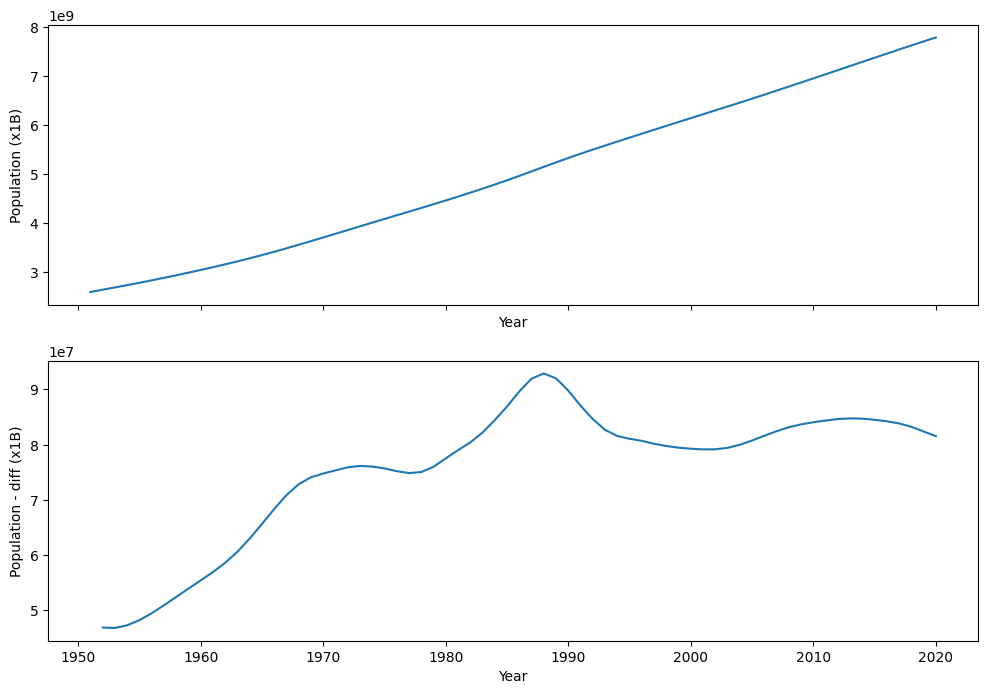

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,8))

ax1.plot(pop['year'], pop['population'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (x1B)')

ax2.plot(date_array_1, pop_diff)
ax2.set_xlabel('Year')
ax2.set_ylabel('Population - diff (x1B)')


We can still see a kind of increasing trend in our first differences datas. Let's check its stationnarity with the ADF test.



*   ADF Test - 2



In [ ]:
# Perform the ADF test on the 'pop_diff' numpy array
ADF_result = adfuller(pop_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
for key, value in ADF_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -2.821250122834776
p-value: 0.05530186629822748
Critial Values:
   1%, -3.5506699942762414
Critial Values:
   5%, -2.913766394626147
Critial Values:
   10%, -2.5946240473991997


With the ADF test, we obtain that the ADF statistic is higher than any of the critical values and that the p-value is greater then 0.05. So this time series is non-stationary and we have to apply a second transformation to make it stationary.

*   Applying the second transformation



After the first transformation, our datas are still non-stationary. We will now apply the second order differencing method to the datas and see what happens.

In [ ]:
pop_diff_2 = np.diff(pop_diff)
date_array_2 = date_array[2:]

Let's plot our new dataframe, the first differenced one and the original one.

Text(0, 0.5, 'Population - 2 diff (x1B)')

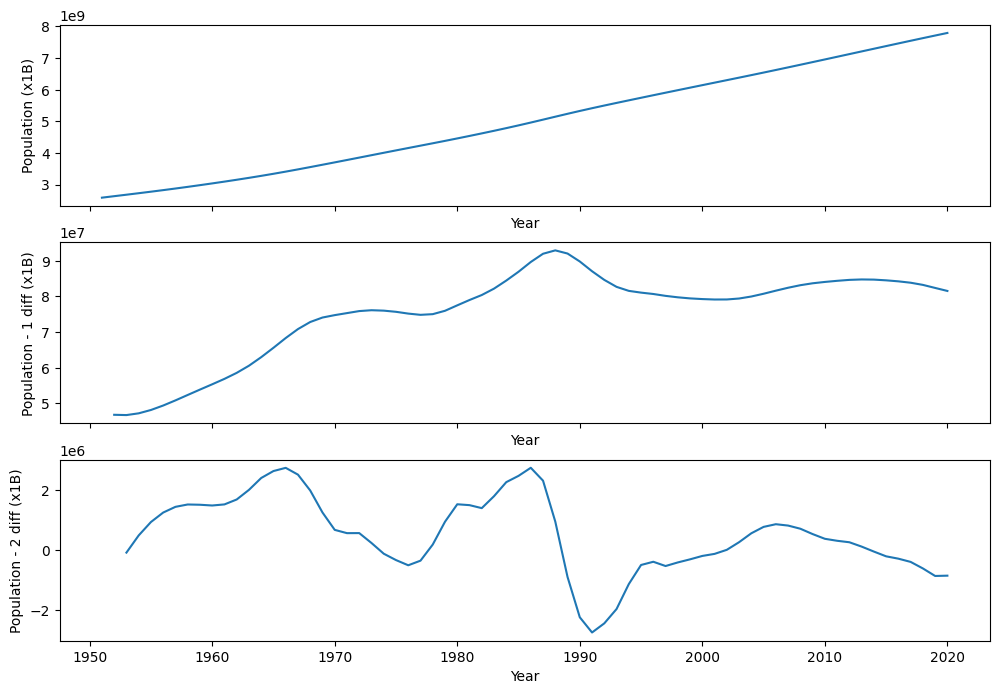

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,8))

ax1.plot(pop['year'], pop['population'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (x1B)')

ax2.plot(date_array_1, pop_diff)
ax2.set_xlabel('Year')
ax2.set_ylabel('Population - 1 diff (x1B)')

ax3.plot(date_array_2, pop_diff_2)
ax3.set_xlabel('Year')
ax3.set_ylabel('Population - 2 diff (x1B)')


On this new plot, we can't really distinguish a trend. Let's check its stationnarity with the ADF test.

*   ADF Test - 3



In [ ]:
# Perform the ADF test on the 'pop_diff_2' array
ADF_result = adfuller(pop_diff_2)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
for key, value in ADF_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -2.4329918005052913
p-value: 0.13264036870302126
Critial Values:
   1%, -3.5506699942762414
Critial Values:
   5%, -2.913766394626147
Critial Values:
   10%, -2.5946240473991997


With the ADF test, we obtain that the ADF statistic is higher than any of the critical values and that the p-value is greater then 0.05. So this time series is non-stationary and we have to apply a third transformation to make it stationary.

*   Applying the third transformation


After the second transformation, our datas are still non-stationary. We will now apply the third order differencing method to the datas and see what happens.

In [ ]:
pop_diff_3 = np.diff(pop_diff_2)
date_array_3 = date_array[3:]

Let's now plot every differenced dataframe we creatd and the original one.

Text(0, 0.5, 'Population - 3 diff (x1B)')

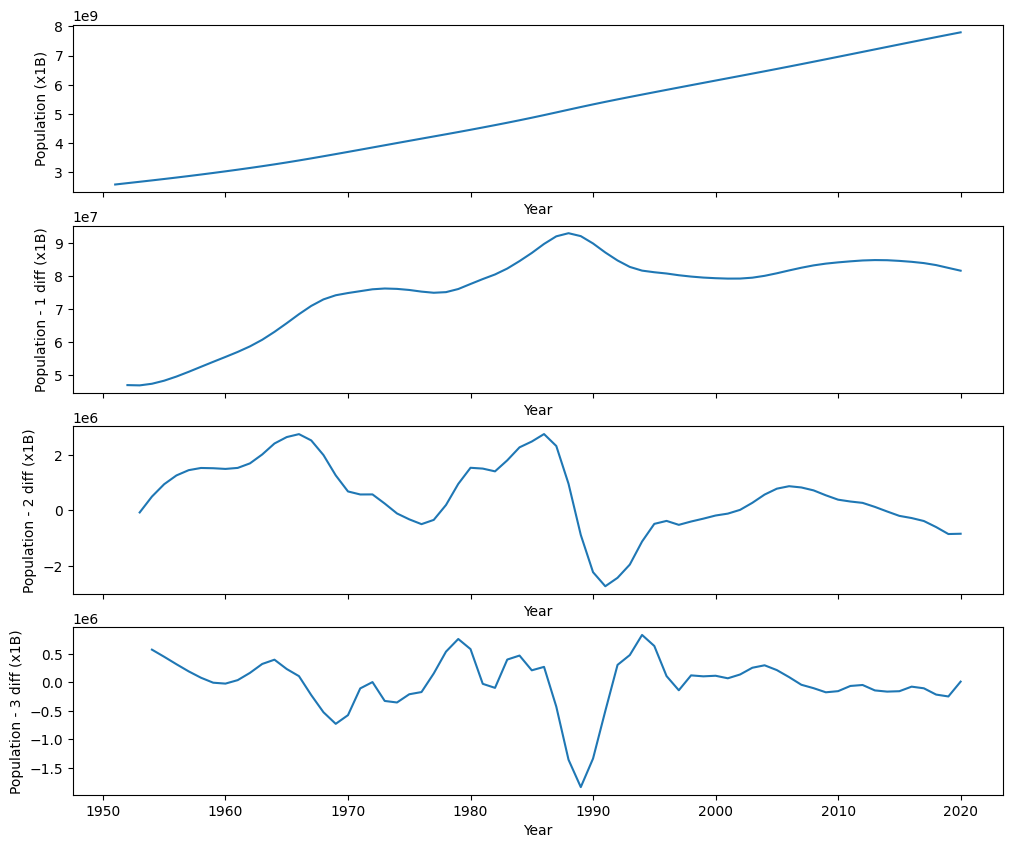

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,10))

ax1.plot(pop['year'], pop['population'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (x1B)')

ax2.plot(date_array_1, pop_diff)
ax2.set_xlabel('Year')
ax2.set_ylabel('Population - 1 diff (x1B)')

ax3.plot(date_array_2, pop_diff_2)
ax3.set_xlabel('Year')
ax3.set_ylabel('Population - 2 diff (x1B)')

ax4.plot(date_array_3, pop_diff_3)
ax4.set_xlabel('Year')
ax4.set_ylabel('Population - 3 diff (x1B)')

We still can't really distinguish a trend in this new plot, let's check its stationnarity with the ADF test.

*   ADF Test - 4



In [ ]:
# Perform the ADF test on the 'pop_diff_3' array
ADF_result = adfuller(pop_diff_3)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
for key, value in ADF_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -3.981744838075849
p-value: 0.0015091757270539084
Critial Values:
   1%, -3.5552728880540942
Critial Values:
   5%, -2.9157312396694217
Critial Values:
   10%, -2.5956695041322315


With the ADF test, we obtain that the ADF statistic is lower than any of the critical values and that the p-value is lower then 0.05. The null hypothesis is now rejected and the serie is now stationary.



### 6- Plotting ACF and PACF

Now that our datas are stationnary, we can plot the ACF and see if we can identify the model of our datas from it.

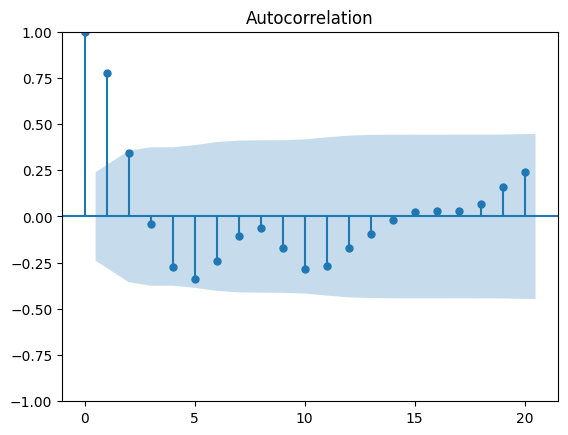

In [ ]:
plot_acf(pop_diff_3, lags=20);

- We have significant autocorrelation coefficients beyond lag 0. Therefore, we know that our process is not a random walk.
- The ACF plot shows a sinusoidal pattern in the plot, which indicates the presence of an autoregressive process.

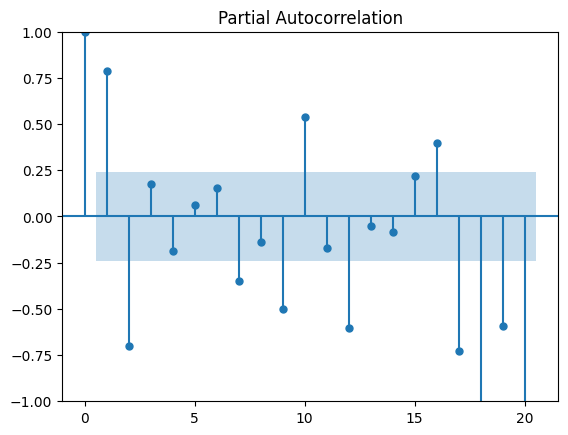

In [ ]:
plot_pacf(pop_diff_3, lags=20);

- In the PACF, plot we can see a clear sinusoidal pattern, meaning that we cannot infer a value for the order p.

- Since there is no clear cutoff between significant and nonsignificant
coefficients in both the and plots, we can conclude that we have an process AR.

### 7- Defining the model

In [ ]:
df_diff = pd.DataFrame({'pop_diff': pop_diff_3})

train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]
print(len(train))
print(len(test))

60
7


To fit the many ARIMA(p,d,q) models, we’ll define the optimize_ARIMA function. It will fit the different models and order them by ascending AIC in order to select the model with the lowest AIC.

In [ ]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

We then define a list of possible values for the orders p and q.

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 3

order_list = list(product(ps, qs))

The optimize_ARIMA function take the 'd' argument, which corresond to the number of times a series must be differenced to become stationary. In our case, **d = 3**.

We can now create a training set and apply the optimize_ARIMA function to it to determine the modele that is the best suitable.

In [ ]:
train = pop['population'][0:66]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(0, 0)",1824.827127,1826.970262
1,"(0, 1)",1834.974501,1839.260770
2,"(0, 2)",1863.536936,1869.966340
3,"(1, 0)",1865.437057,1869.723327
4,"(0, 3)",1875.990175,1884.562714
5,"(1, 1)",1898.945370,1905.374774
6,"(1, 3)",1901.625255,1912.340929
7,"(1, 2)",1903.751804,1912.324342
8,"(2, 3)",1951.077597,1963.936405
9,"(2, 2)",1960.438502,1971.154176


The returned DataFrame shows that a value of 0 for both p and q results in the lowest AIC. An ARIMA(0,3,0) model seems to be the most suitable for this situa-
tion. Now let’s assess the validity of the model by studying its residuals.

### 8- Residuals Analysis

Now that we have defined a model, we can try and fit it to our training data and display the residuals’ diagnostics.

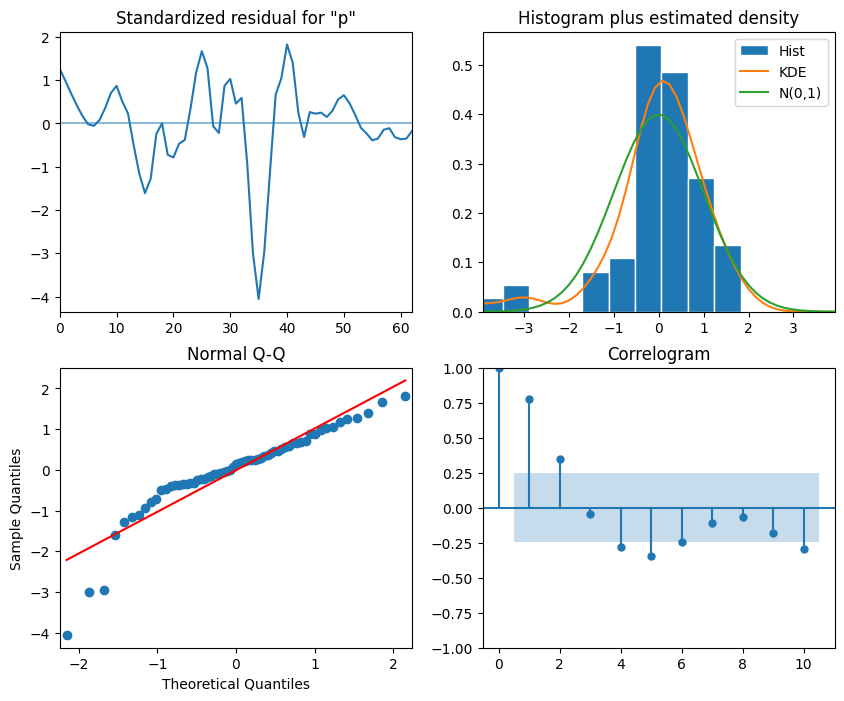

In [ ]:
model = SARIMAX(train, order=(0,3,0), simple_differencing=False)
model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(10,8));

- The Q-Q shows us a line that is fairly straight, meaning that the residuals’s distribution is close to a normal distribution.
- On the correlogram, we can see that we have some significant coeeficiants, meaning that the residual may be depending on other variables.
But lets continue with this model to see if can do something.

Let's apply the Ljung-Box test to determine if the residuals are correlated.

In [ ]:
residuals = model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,30.681637,3.040287e-08
2,32.627955,8.221092e-08
3,32.627955,3.858433e-07
4,32.627955,1.423398e-06
5,32.627955,4.460895e-06
6,32.627955,1.236345e-05
7,32.627955,3.105302e-05
8,32.627955,7.185535e-05
9,32.627955,1.550025e-04
10,32.627955,3.144927e-04


Every lb_pvalue that we have is lesser then 0.05 so we can reject the null hypothesis, meaning that our residuals are correlated.

Our model does not pass the Ljungbox test but we will keep going to see what we can do.

### 9- Testing

Let's first defining a testing dataset and do some naive predictions on it.

In [ ]:
test = pop.iloc[66:].copy()
test.loc[:, 'naive_seasonal'] = pop['population'].iloc[62:66].values

test

,year,population,naive_seasonal
66,2017,7547859000,7210582000
67,2018,7631091000,7295291000
68,2019,7713468000,7379797000
69,2020,7795000000,7464022000


Now, let's try to apply our model on the testing dataset.

In [ ]:
ARIMA_pred = model_fit.get_prediction(66, 69).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,year,population,naive_seasonal,ARIMA_pred
66,2017,7547859000,7210582000,7.547966e+09
67,2018,7631091000,7295291000,7.631629e+09
68,2019,7713468000,7379797000,7.715011e+09
69,2020,7795000000,7464022000,7.798112e+09


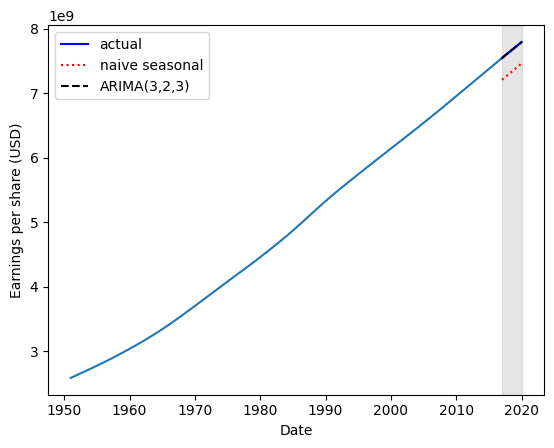

In [ ]:
fig, ax = plt.subplots()

ax.plot(pop['year'], pop['population'])
ax.plot(test['year'], test['population'], 'b-', label='actual')
ax.plot(test['year'], test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['year'], test['ARIMA_pred'], 'k--', label='ARIMA(3,2,3)')

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(2017, 2020, color='#808080', alpha=0.2)

ax.legend(loc=2)


We can see from our predictions and on the plot that even if our model doesn't pass the Ljungbox test, we still have some accurate prediction.

Let's now evaluate our model with the mean absolute percentage error.

In [ ]:
mape_naive_seasonal = mape(test['population'], test['naive_seasonal'])*100
mape_ARIMA = mape(test['population'], test['ARIMA_pred'])*100

print('MAPE Naive:',"%.2f" % (mape_naive_seasonal),'%')
print('MAPE ARIMA:',"%.2f" % (mape_ARIMA),'%')

MAPE Naive: 4.36 %
MAPE ARIMA: 0.02 %


We have a MAPE of 0.02% for our ARIMA model which we can can considere as very good in terms of model accuracy. Such a low MAPE indicates that the model predictions are very close to the actual values of the time series even without passing the Ljungbox test.

### 10- Forecasting

Now that we now that our model is good, we can try to fit our model on every data of our dataset and make some prediction on a window of 5.

In [ ]:
model = SARIMAX(pop['population'], order=(0,3,0), simple_differencing=False)
model_fit = model.fit(disp=False)

In [ ]:
prediction = model_fit.forecast(steps=5)

for i in range(0, 5):
  print("World population predicted in", 2020 + pop.index.get_loc(pop.index[i + 1]), ': ', prediction.iloc[i] / 1000000000, 'Billions')

World population predicted in 2021 :  7.875687 Billions
World population predicted in 2022 :  7.955529 Billions
World population predicted in 2023 :  8.034526 Billions
World population predicted in 2024 :  8.112678 Billions
World population predicted in 2025 :  8.189985 Billions


We now have our predictions based on the value from 1951 to 2020 for years 2021-2025.

In [ ]:
#creating a df with the predicted value and the corresponding year
dates = pd.date_range(start='2021', end='2026', freq='Y')
df_predictions = pd.DataFrame({'population': prediction, 'date': dates})
df_predictions['year'] = df_predictions['date'].apply(lambda x: x.year)
df_predictions.drop('date', axis=1, inplace=True)
df_predictions.head()

,population,year
70,7.875687e+09,2021
71,7.955529e+09,2022
72,8.034526e+09,2023
73,8.112678e+09,2024
74,8.189985e+09,2025


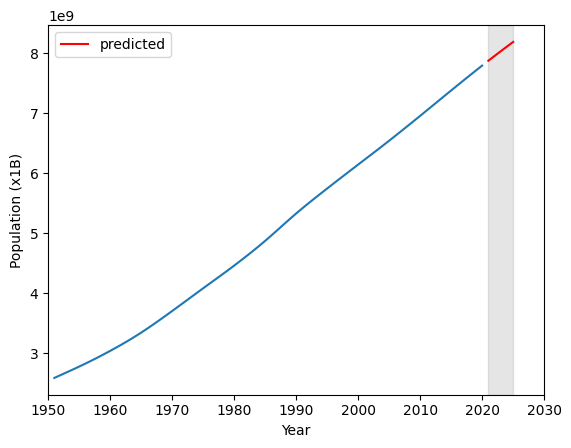

In [ ]:
fig, ax = plt.subplots()

ax.plot(pop['year'], pop['population'])
ax.plot(df_predictions['year'], df_predictions['population'], 'r-', label='predicted')

ax.set_xlabel('Year')
ax.set_ylabel('Population (x1B)')
ax.axvspan(2021, 2025, color='#808080', alpha=0.2)
ax.set_xlim([1950, 2030])

ax.legend(loc=2)

Conclusion

With the help of our model, we have been able to make some pretty convincing predictions about the evolution of the world population. We have thus obtained :
- 2021: 7.87 Billions
- 2022: 7.95 Billions
- 2023: 8.03 Billions
- 2024: 8.11 Billions
- 2025: 8.18 Billions